## Exploratory Data Analysis on job salaries in Data Science
### About Dataset


work_year: The year the salary was paid

experience_level: The experience level in the job during the year with the following possible values: EN =
Entry-level / Junior; MI = Mid-level / Intermediate; SE = Senior-level / Expert; EX = Executive-level / Director

employment_type: The type of employement for the role: PT = Part-time; FT = Full-time; CT = Contract; FL =
Freelance

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via
fxdata.foorilla.com).

employee_residence: Employee's primary country of residence in during the work year as an ISO 3166
country code(Alpha-2 code).

remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 = No remote
work (less than 20%); 50 = Partially remote; 100 = Fully remote (more than 80%)

company_location: The country of the employer's main office or contracting branch as an ISO 3166 country
code(Alpha-2 code).

company_size: The average number of people that worked for the company during the year: S = less than
50 employees (small); M = 50 to 250 employees (medium); L = more than 250 employees (large)

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the dataset

In [2]:
df=pd.read_csv("data science_salaries.csv",index_col=[0])

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.shape

(607, 11)

##### The data contains 607 rows and 11 columns

In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

## Data Cleaning

Drop column which are not rrequired

In [6]:
df.drop(["salary_currency", "salary"],axis=1,inplace=True)
# Because salary in USD are available

In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

### Replace feature value for better understanding

In [8]:
df["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [9]:
df["employment_type"].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [10]:
df["remote_ratio"].unique()

array([  0,  50, 100], dtype=int64)

In [11]:
df["company_size"].unique()

array(['L', 'S', 'M'], dtype=object)

In [12]:
df["experience_level"]=df["experience_level"].map({"MI":"Mid-level/Intermediate","SE":"Senior-level/Expert","EN":"Entry-level/Junior","EX":"Executive-level/Director"})
df["employment_type"]=df["employment_type"].map({"FT":"Full-time","CT":"Contract","PT":"Part-time","FL":"Freelance"})
df["remote_ratio"]=df["remote_ratio"].map({0:"No remote",50:"Partially remote",100:"Fully remote"})
df["company_size"]=df["company_size"].map({"L":"large","S":"small","M":"medium"})

# we can use replace function too instead of map. Both will give same result

In [13]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level/Intermediate,Full-time,Data Scientist,79833,DE,No remote,DE,large
1,2020,Senior-level/Expert,Full-time,Machine Learning Scientist,260000,JP,No remote,JP,small
2,2020,Senior-level/Expert,Full-time,Big Data Engineer,109024,GB,Partially remote,GB,medium
3,2020,Mid-level/Intermediate,Full-time,Product Data Analyst,20000,HN,No remote,HN,small
4,2020,Senior-level/Expert,Full-time,Machine Learning Engineer,150000,US,Partially remote,US,large


### Check missing value

In [14]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

look like no missing value present

### Check duplicate value

In [15]:
df.duplicated().sum()

42

There are 42 duplicate value are present in data. So we need to drop it.

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
# check again
df.duplicated().sum()

0

In [18]:
# now check shape # previously it was (607,12)
df.shape

(565, 9)

### Univariate Analysis

#### Salary

In [19]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [20]:
df["salary_in_usd"].describe()

count       565.000000
mean     110610.343363
std       72280.702792
min        2859.000000
25%       60757.000000
50%      100000.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [21]:
df["salary_in_usd"]

0       79833
1      260000
2      109024
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary_in_usd, Length: 565, dtype: int64

C:\Users\L184\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L184\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


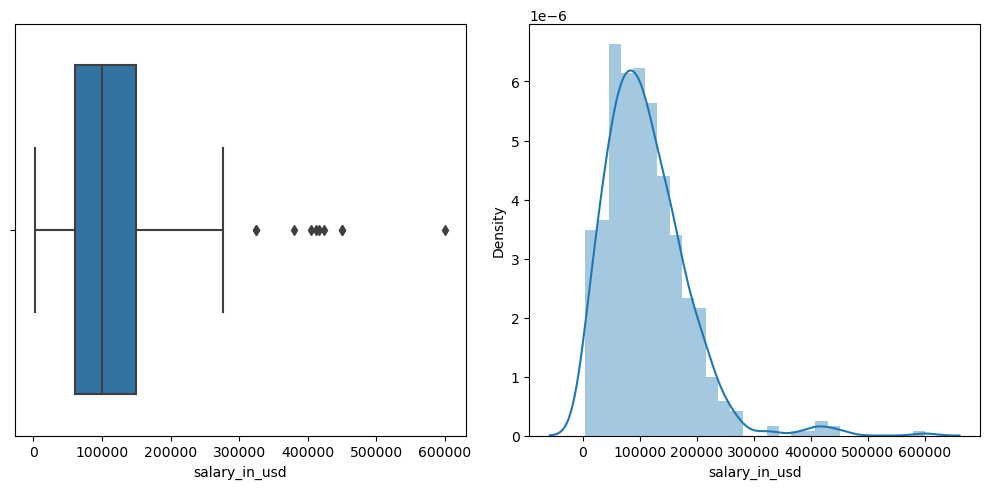

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(df["salary_in_usd"])

plt.subplot(122)
sns.distplot(df["salary_in_usd"])

plt.tight_layout()
plt.show()

#### Means salary above 300000 is consider an outlier

In [23]:
df_outlier=df[df["salary_in_usd"]>300000]

In [24]:
df_outlier.shape

(10, 9)

Means that there are 10 row where in outlier are present

In [25]:
# reemove outlier
df=df[~(df["salary_in_usd"]>300000)] # tilde(~) operator used to negate the condition

In [26]:
df.to_csv("Data_science_salary_cleandata.csv")

In [27]:
df.shape

(555, 9)

#### create function that will plot the countplot for the provided feature

In [28]:
def count_plot(feature):
    plt.figure(figsize=(15,5))
    ax=sns.countplot(data=df,x=feature)
    
    for i in ax.patches: # Iterates over each bar patch in the plot.
        ax.annotate("{:.1f}".format(i.get_height()),(i.get_x()+0.3,i.get_height()+2)) # Annotates each bar 
                                                                                      # with the count value. 
        # The "{:.1f}".format(i.get_height()) formats the height value of the bar to a single decimal point.
        # The (i.get_x() + 0.3, i.get_height() + 2) specifies the coordinates where the annotation text will
        # be placed, slightly above the top of each bar.
    plt.xticks(rotation=90)    
    plt.show()

In [29]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

## work_year

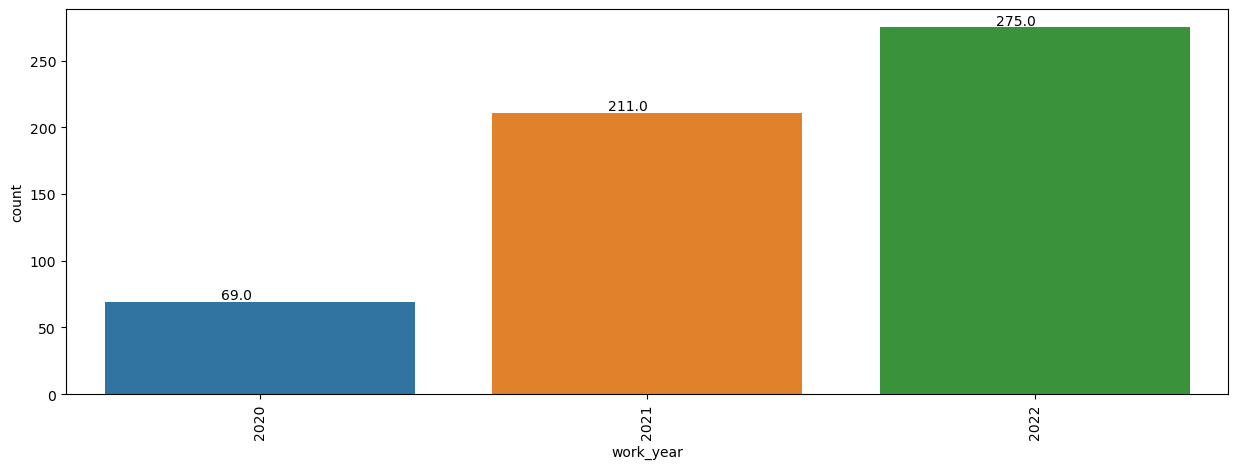

In [30]:
# call function
count_plot("work_year")

### Insights
1. Most of the record in data contain salaries for year 2022
2. There are less record in data containing salary for year 2020

## Experience level

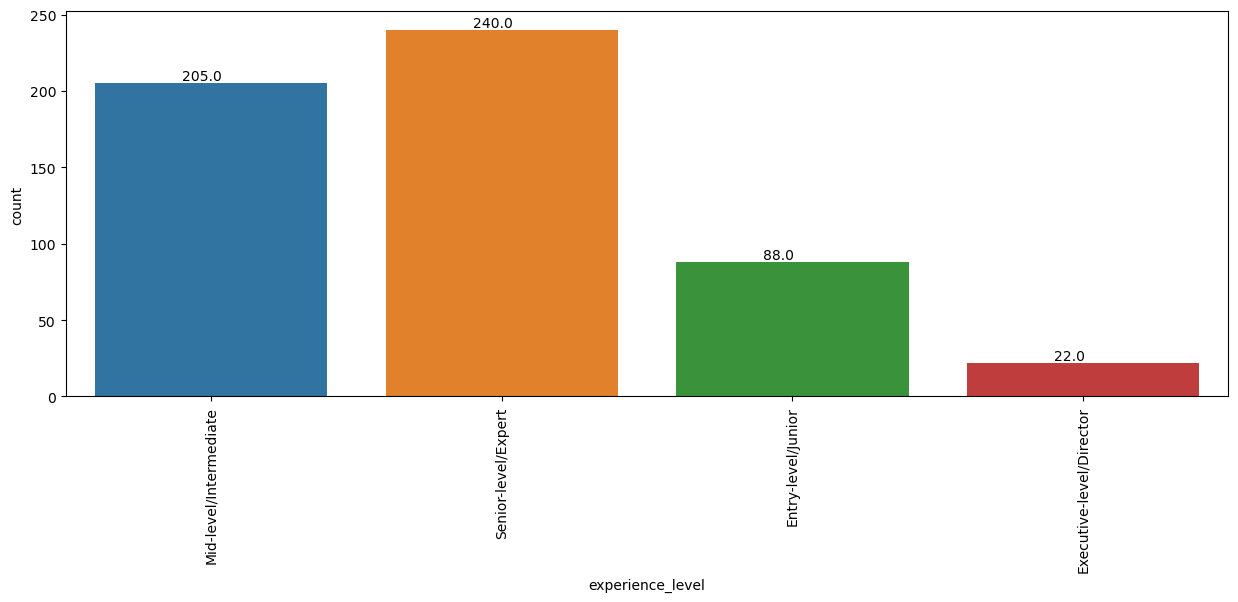

In [31]:
count_plot("experience_level")

#### Insights

1. Most of the record are for experience level senior-level/Expert
2. There are very less record for experience level Executive-level/Director

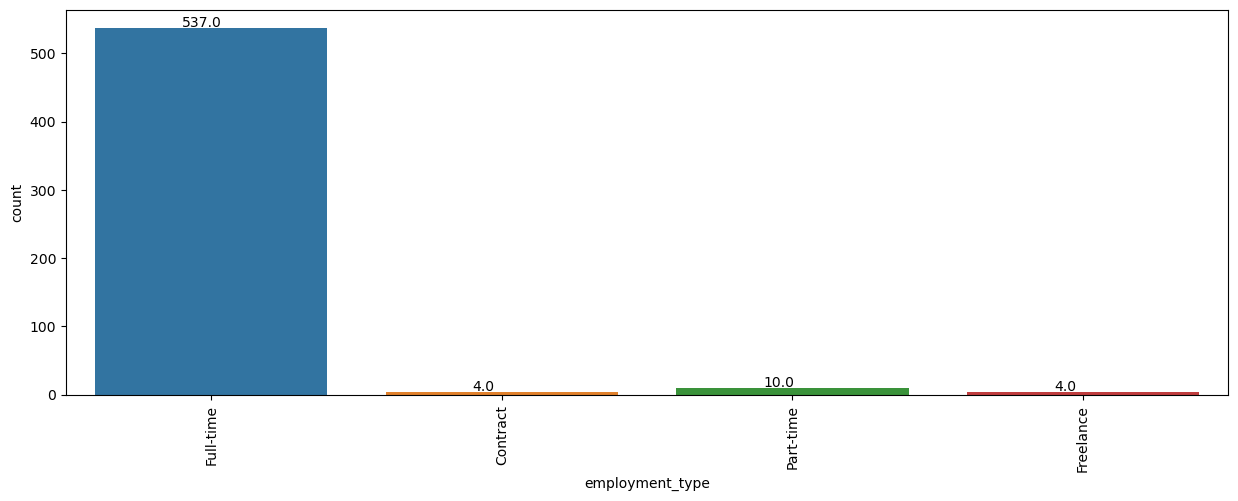

In [32]:
count_plot("employment_type")

### Insights
1. Most of the records are full-time Employee

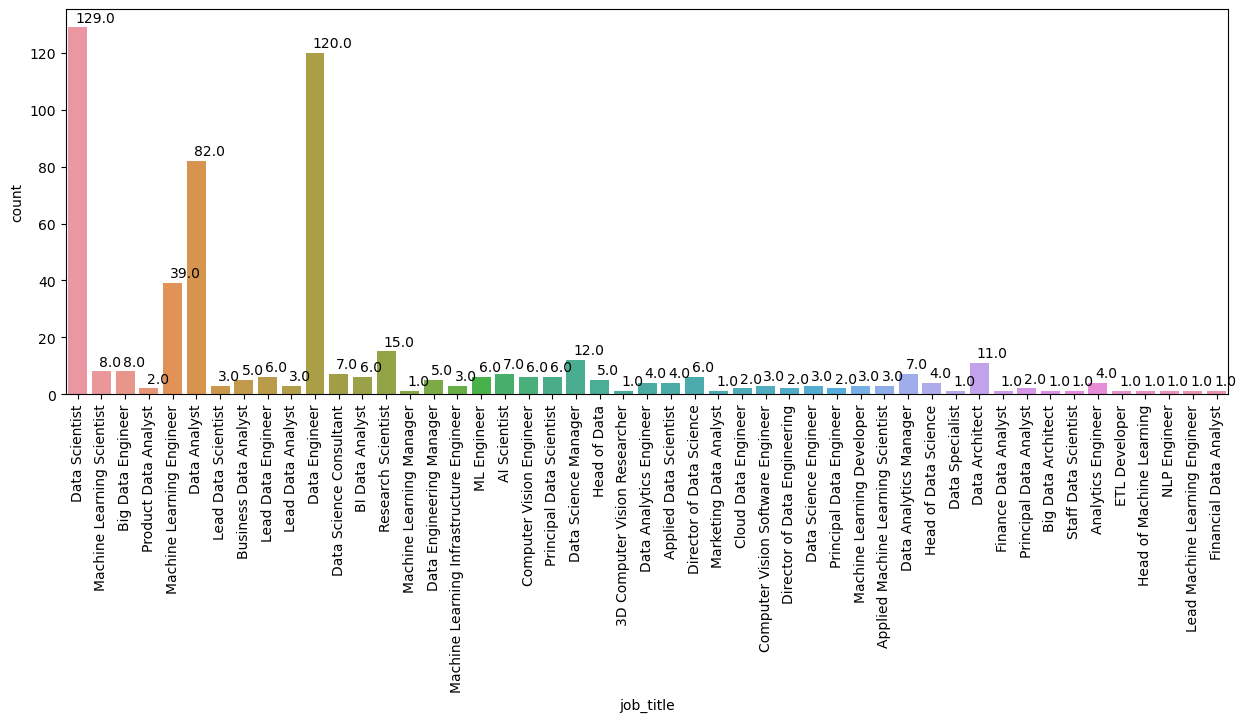

In [33]:
count_plot("job_title")

### Insights
1. Most of the popular job title are Data Scientist,Data Engineer, Data Analyst and Machine Learning Engineer

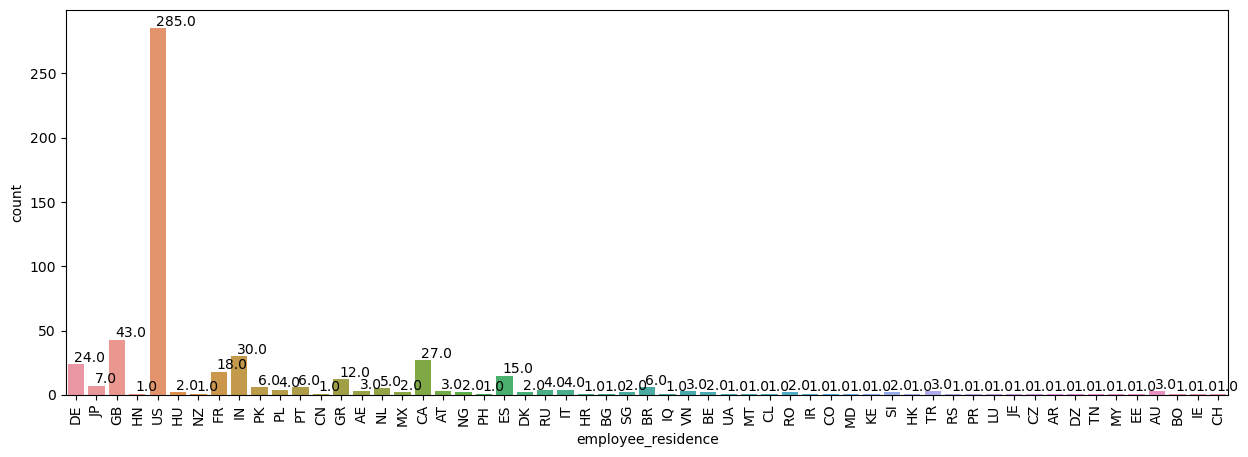

In [34]:
count_plot("employee_residence")

### Insights
1. Most of the Employee are from US

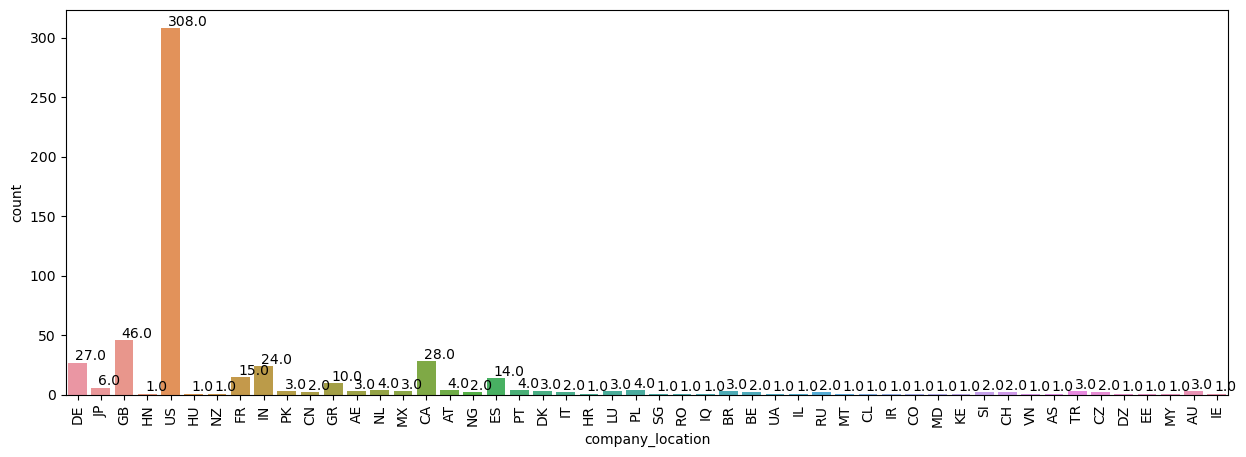

In [35]:
count_plot("company_location")

### Insights
1. Most of the company location are in US

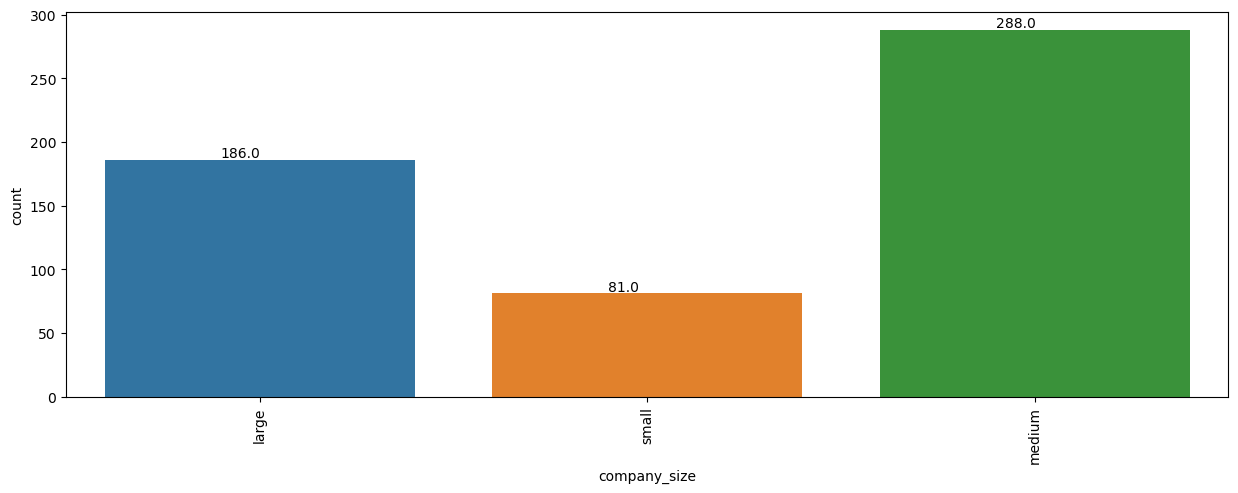

In [36]:
count_plot("company_size")

### Insights
1. Most of the company are belong to medium size
2. least company are in small size

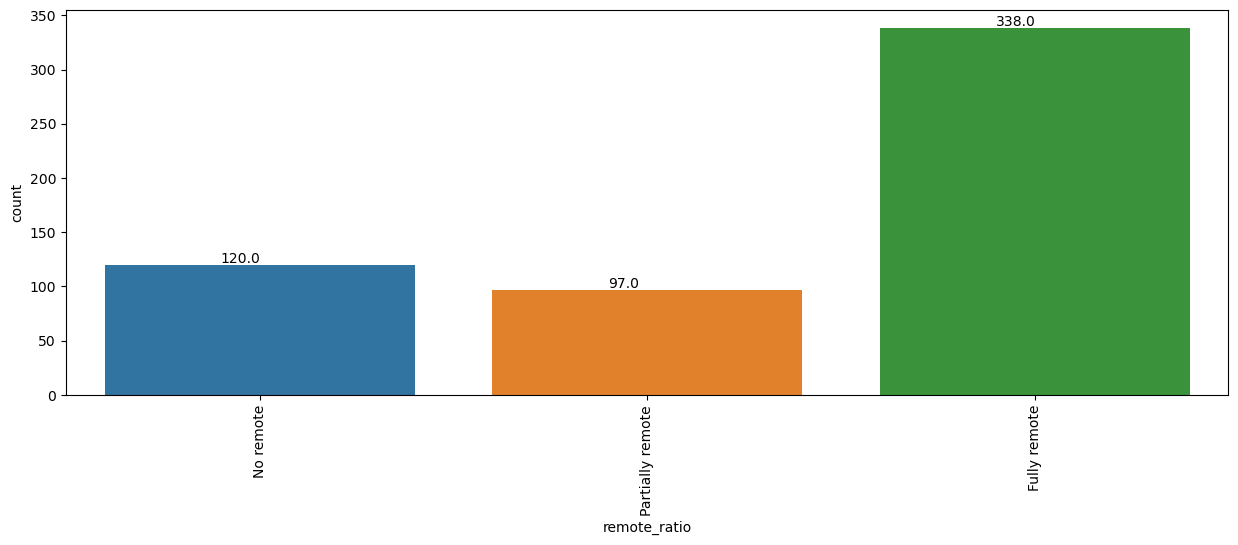

In [37]:
count_plot("remote_ratio")

### Insights
1. Most Employee are working as in fully remote

## Multivariate Analysis

Lets try to answer below questions:
1. Which job title earns highest salary ?
2. What is the average salary for each experience level ?
3. What is the average salary for company size Large, Small and Medium ?
4. Does people working full time earns more than contract base employees ?
5. Is salary less for employee woking remotely than who comes to office ?
6. Which country pays more to the employees ?
7. What is the highest earning job in highest paying countries ?
8. What is the highest earning job titles working at expert level ?
9. Has salary of data science job roles increased over the passing years ?
10. What is the trend of salary paid by medium size company over the passing years ?
11. What is the trend of salary paid by large size company over the passing years ?
12. What is the trend of salary paid by small size company over the passing years ?

In [38]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level/Intermediate,Full-time,Data Scientist,79833,DE,No remote,DE,large
1,2020,Senior-level/Expert,Full-time,Machine Learning Scientist,260000,JP,No remote,JP,small


# Q1. Which job title earns highest salary ?


In [39]:
df1=df.groupby(["job_title"],as_index=False)["salary_in_usd"].mean()

In [40]:
df1

,job_title,salary_in_usd
0,3D Computer Vision Researcher,5409.000000
1,AI Scientist,66135.571429
2,Analytics Engineer,175000.000000
3,Applied Data Scientist,124568.750000
4,Applied Machine Learning Scientist,48425.000000
5,BI Data Analyst,74755.166667
6,Big Data Architect,99703.000000
7,Big Data Engineer,51974.000000
8,Business Data Analyst,76691.200000
9,Cloud Data Engineer,124647.000000


In [41]:
df1[df1["salary_in_usd"]==df1["salary_in_usd"].max()]

,job_title,salary_in_usd
44,Principal Data Engineer,192500.0


### Insights
1. Highest earning job is Principle Data Engineer job

In [42]:
df1.sort_values(by="salary_in_usd",ascending=False)[0:5]

,job_title,salary_in_usd
44,Principal Data Engineer,192500.000000
45,Principal Data Scientist,181782.833333
15,Data Architect,177873.909091
2,Analytics Engineer,175000.000000
24,Director of Data Science,173419.666667


### Insights
1. Top 5 Highest earning job are Principle Data Engineer,Principle DataScientist, 
   Data Architect,Analytics Engineer and Director of DataScience

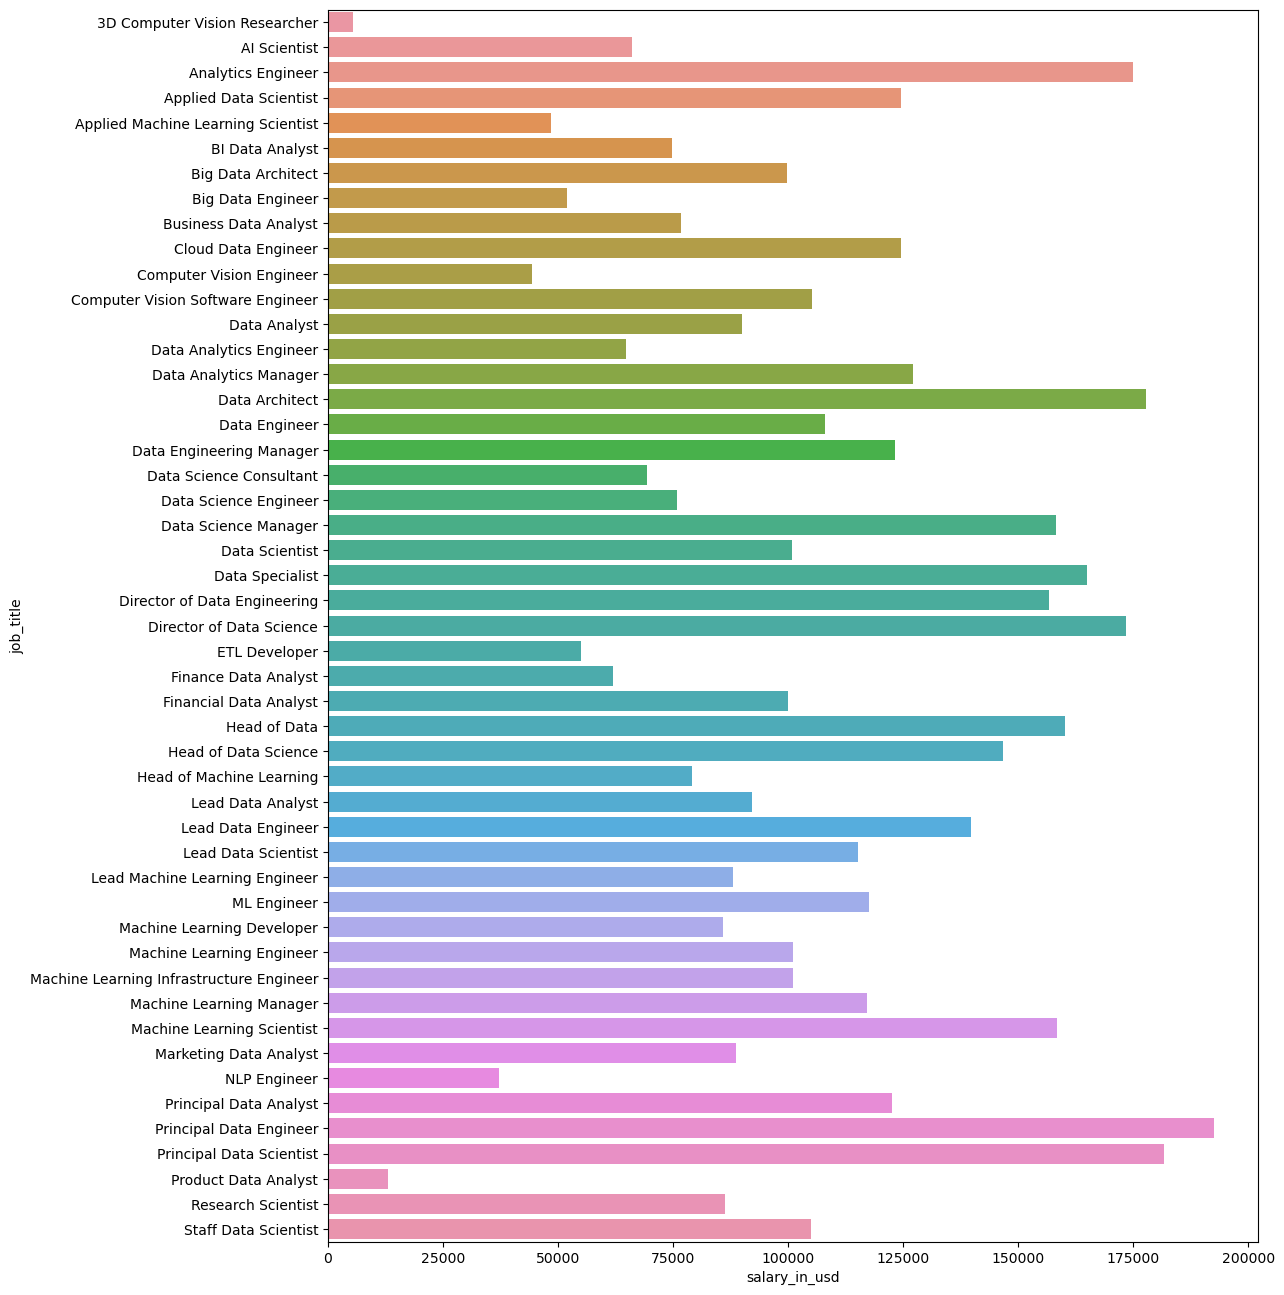

In [43]:
plt.figure(figsize=(12,16))
sns.barplot(data=df1,y="job_title",x="salary_in_usd")
plt.show()

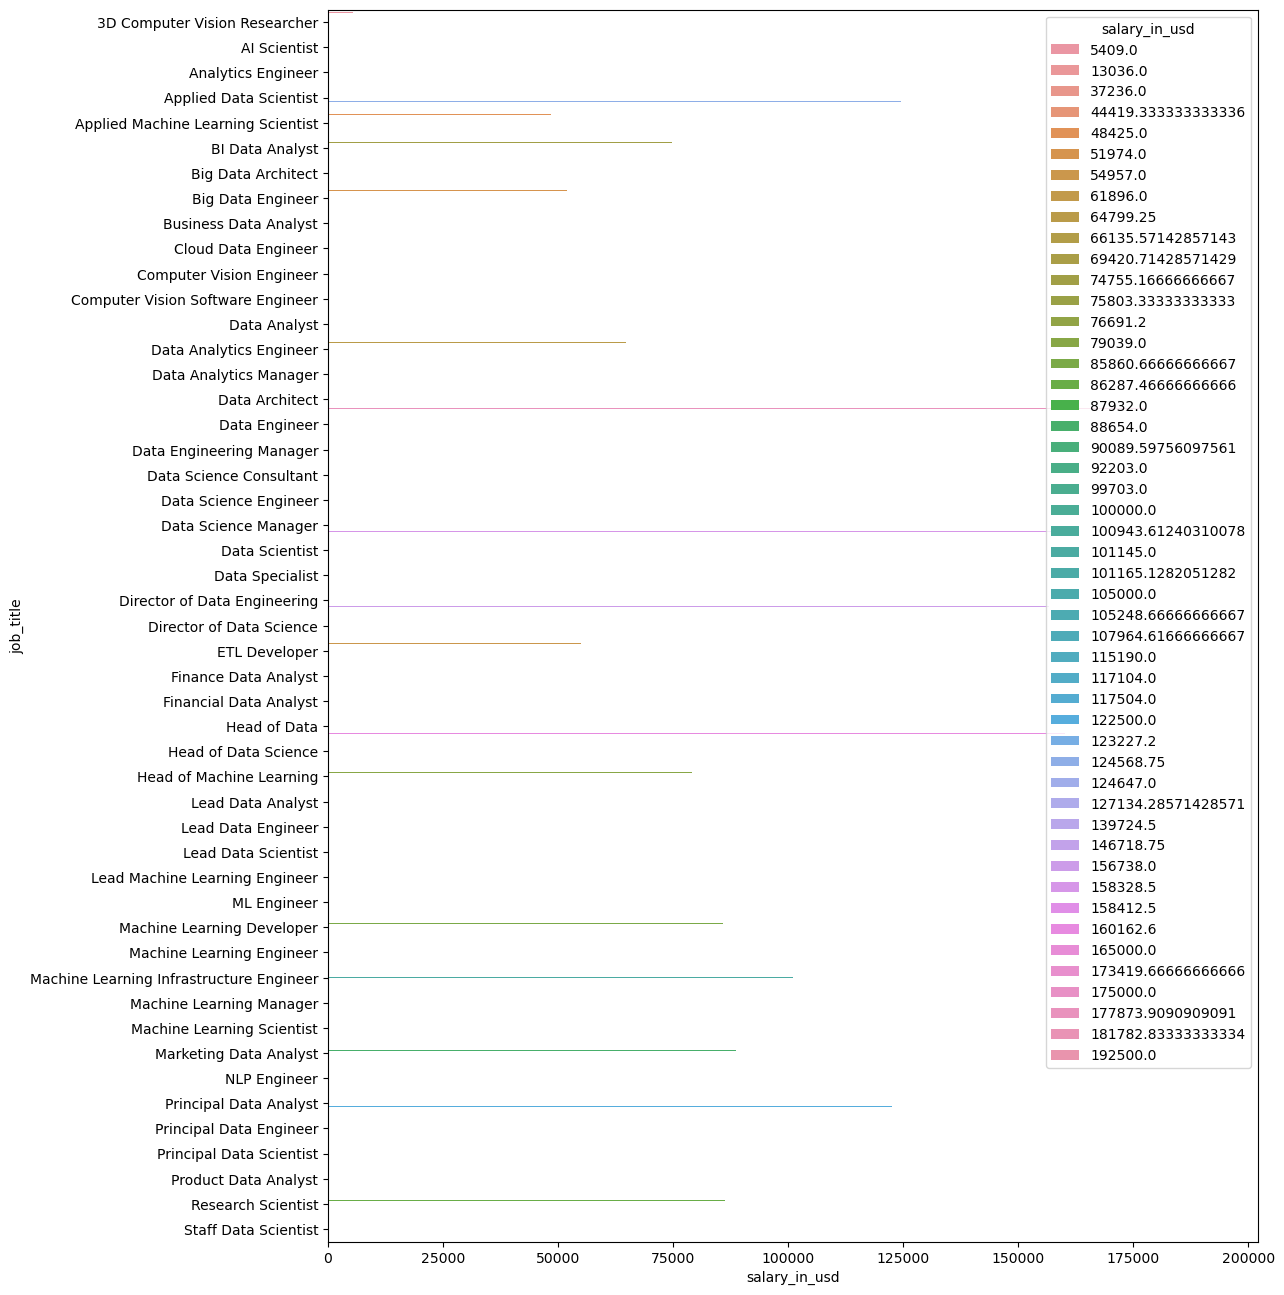

In [44]:
plt.figure(figsize=(12,16))
sns.barplot(data=df1,y="job_title",x="salary_in_usd",hue="salary_in_usd")
plt.show()

# Q2. What is the average salary for each experience level ?

In [45]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [46]:
df2=df.groupby(["experience_level"],as_index=False)["salary_in_usd"].mean()

In [47]:
df2

,experience_level,salary_in_usd
0,Entry-level/Junior,61643.318182
1,Executive-level/Director,159963.318182
2,Mid-level/Intermediate,82624.112195
3,Senior-level/Expert,135117.066667


In [48]:
df2.columns

Index(['experience_level', 'salary_in_usd'], dtype='object')

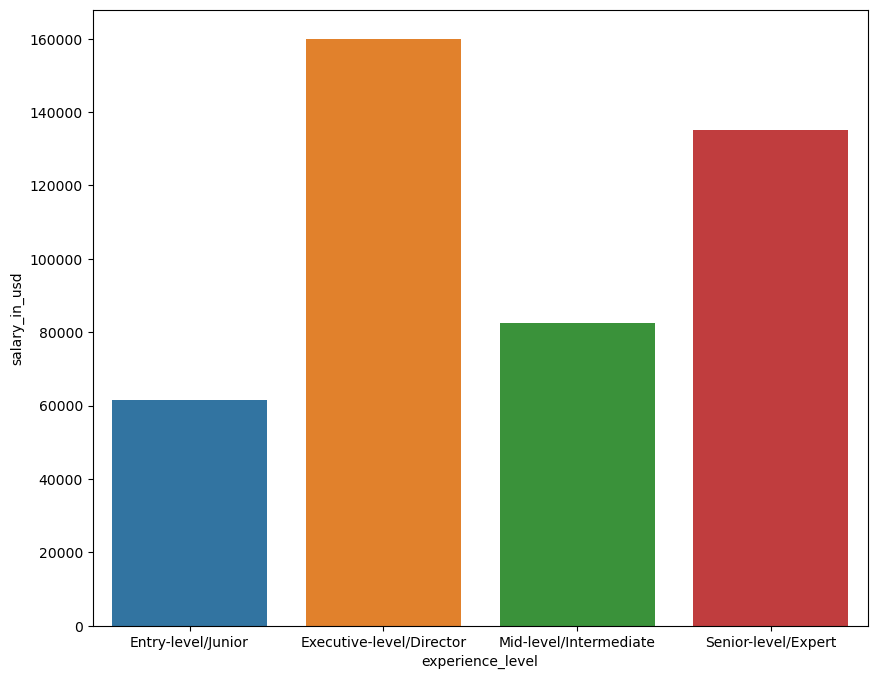

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(data=df2,x="experience_level",y="salary_in_usd")
plt.show()

### Insights
1. Average Salary of Executive-level/Director is more than the Senior-level/Expert

# Q3. What is the average salary for company size Large, Small and Medium ?

In [51]:
df3=df.groupby(["company_size"],as_index=False)["salary_in_usd"].mean()
df3

,company_size,salary_in_usd
0,large,106560.639785
1,medium,112916.850694
2,small,73697.679012


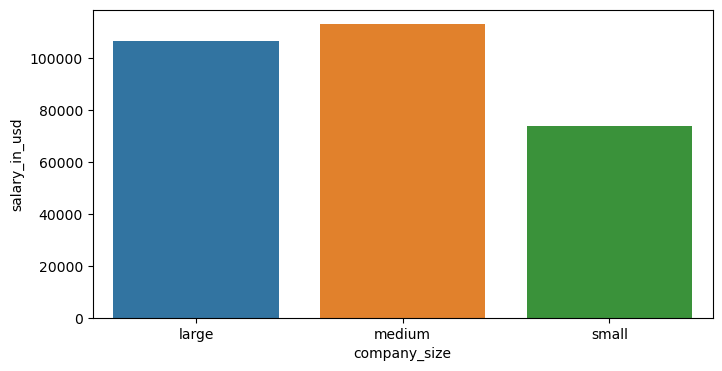

In [54]:
plt.figure(figsize=(8,4))
sns.barplot(data=df3,x="company_size",y="salary_in_usd")
plt.show()

# Q4. Does people working full time earns more than contract base employees ?

In [55]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [56]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level/Intermediate,Full-time,Data Scientist,79833,DE,No remote,DE,large
1,2020,Senior-level/Expert,Full-time,Machine Learning Scientist,260000,JP,No remote,JP,small
2,2020,Senior-level/Expert,Full-time,Big Data Engineer,109024,GB,Partially remote,GB,medium
3,2020,Mid-level/Intermediate,Full-time,Product Data Analyst,20000,HN,No remote,HN,small
4,2020,Senior-level/Expert,Full-time,Machine Learning Engineer,150000,US,Partially remote,US,large


In [57]:
df4=df.groupby(["employment_type"],as_index=False)["salary_in_usd"].mean()
df4

,employment_type,salary_in_usd
0,Contract,126718.750000
1,Freelance,48000.000000
2,Full-time,106667.158287
3,Part-time,33070.500000


In [58]:
df4["salary_in_usd"].max()

126718.75

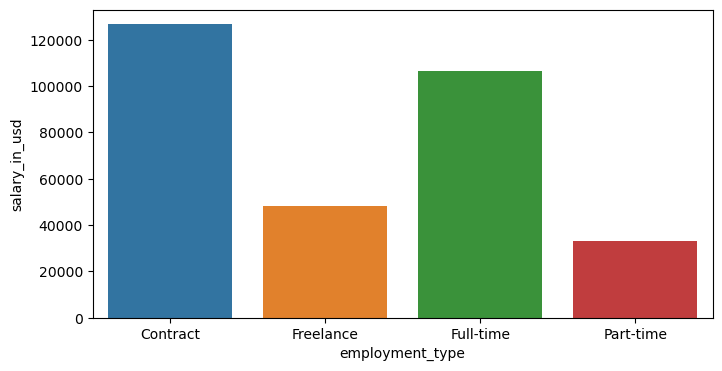

In [59]:
plt.figure(figsize=(8,4))
sns.barplot(data=df4,x="employment_type",y="salary_in_usd")
plt.show()

### Insights
No,people working full time didn't earns more than contract base employees 

# Q5. Is salary less for employee woking remotely than who comes to office ?

In [60]:
df5=df.groupby(["remote_ratio"],as_index=False)["salary_in_usd"].mean()
df5

,remote_ratio,salary_in_usd
0,Fully remote,113822.674556
1,No remote,102916.950000
2,Partially remote,77193.257732


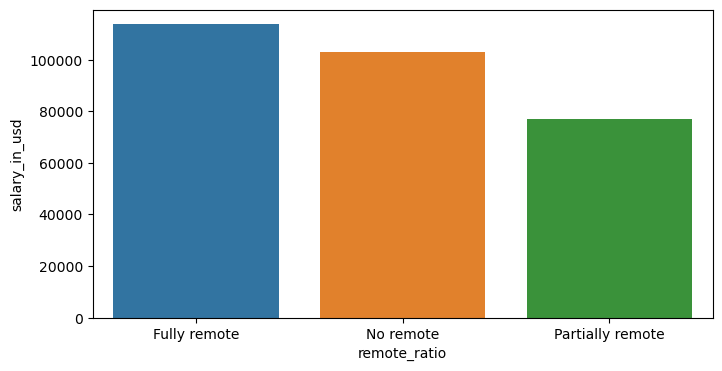

In [61]:
plt.figure(figsize=(8,4))
sns.barplot(data=df5,x="remote_ratio",y="salary_in_usd")
plt.show()

### Insights
No, salary is not less for employee woking remotely than who comes to office

# Q6. Which country pays more to the employees ?

In [63]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level/Intermediate,Full-time,Data Scientist,79833,DE,No remote,DE,large
1,2020,Senior-level/Expert,Full-time,Machine Learning Scientist,260000,JP,No remote,JP,small
2,2020,Senior-level/Expert,Full-time,Big Data Engineer,109024,GB,Partially remote,GB,medium
3,2020,Mid-level/Intermediate,Full-time,Product Data Analyst,20000,HN,No remote,HN,small
4,2020,Senior-level/Expert,Full-time,Machine Learning Engineer,150000,US,Partially remote,US,large


In [65]:
df6=df.groupby(["company_location"],as_index=False)["salary_in_usd"].mean()
df6.head()

,company_location,salary_in_usd
0,AE,100000.000000
1,AS,18053.000000
2,AT,72920.750000
3,AU,108042.666667
4,BE,85699.000000


In [80]:
df6.sort_values(by="salary_in_usd",ascending=False).head()

,company_location,salary_in_usd
43,RU,157500.000000
48,US,135390.168831
38,NZ,125000.000000
24,IL,119059.000000
29,JP,114127.333333


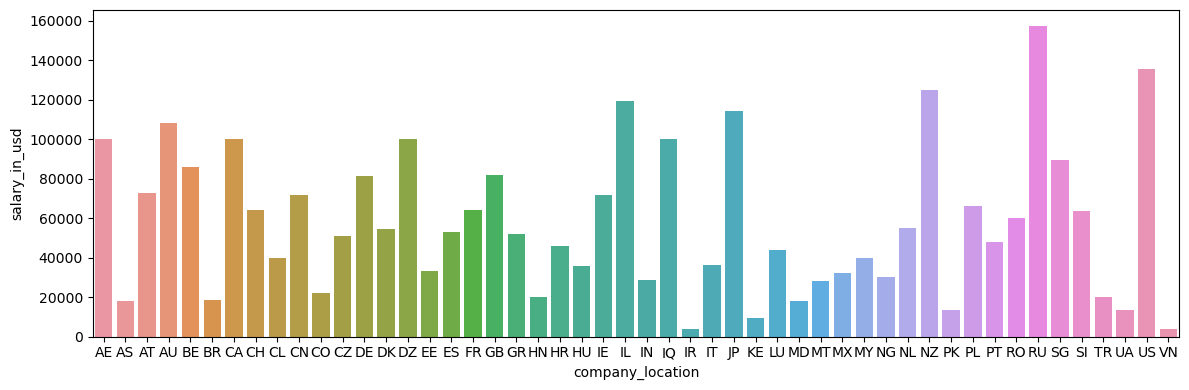

In [81]:
plt.figure(figsize=(12,4))
sns.barplot(data=df6,x="company_location",y="salary_in_usd")
plt.tight_layout()
plt.show()

### Insights
The company which located in RU(Russia) country pays more to employees

# Q7. What is the highest earning job in highest paying countries ?

In [82]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level/Intermediate,Full-time,Data Scientist,79833,DE,No remote,DE,large
1,2020,Senior-level/Expert,Full-time,Machine Learning Scientist,260000,JP,No remote,JP,small
2,2020,Senior-level/Expert,Full-time,Big Data Engineer,109024,GB,Partially remote,GB,medium
3,2020,Mid-level/Intermediate,Full-time,Product Data Analyst,20000,HN,No remote,HN,small
4,2020,Senior-level/Expert,Full-time,Machine Learning Engineer,150000,US,Partially remote,US,large


In [85]:
df_Russia=df[df["company_location"]=="RU"]
df_Russia

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
160,2021,Executive-level/Director,Full-time,Head of Data,230000,RU,Partially remote,RU,large
161,2021,Executive-level/Director,Full-time,Head of Data Science,85000,RU,No remote,RU,medium


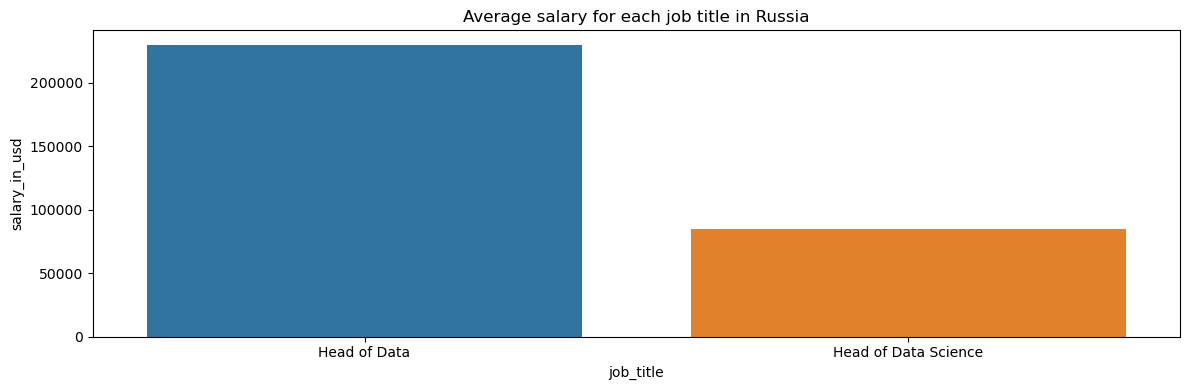

In [89]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_Russia,x="job_title",y="salary_in_usd")
plt.title("Average salary for each job title in Russia")
plt.tight_layout()
plt.show()

### Insights:
Head of Data is the highest earning job in highest paying countries i.e. Russia

# Q8. What is the highest earning job titles working at expert level ?

In [90]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level/Intermediate,Full-time,Data Scientist,79833,DE,No remote,DE,large
1,2020,Senior-level/Expert,Full-time,Machine Learning Scientist,260000,JP,No remote,JP,small
2,2020,Senior-level/Expert,Full-time,Big Data Engineer,109024,GB,Partially remote,GB,medium
3,2020,Mid-level/Intermediate,Full-time,Product Data Analyst,20000,HN,No remote,HN,small
4,2020,Senior-level/Expert,Full-time,Machine Learning Engineer,150000,US,Partially remote,US,large


In [92]:
df["experience_level"].unique()

array(['Mid-level/Intermediate', 'Senior-level/Expert',
       'Entry-level/Junior', 'Executive-level/Director'], dtype=object)

In [94]:
df_expert=df[df["experience_level"]=="Senior-level/Expert"]
df_expert.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2020,Senior-level/Expert,Full-time,Machine Learning Scientist,260000,JP,No remote,JP,small
2,2020,Senior-level/Expert,Full-time,Big Data Engineer,109024,GB,Partially remote,GB,medium
4,2020,Senior-level/Expert,Full-time,Machine Learning Engineer,150000,US,Partially remote,US,large
6,2020,Senior-level/Expert,Full-time,Lead Data Scientist,190000,US,Fully remote,US,small
9,2020,Senior-level/Expert,Full-time,Lead Data Engineer,125000,NZ,Partially remote,NZ,small


In [98]:
df9=df_expert.groupby(["job_title"],as_index=False)["salary_in_usd"].mean()
df9.head()

,job_title,salary_in_usd
0,AI Scientist,55000.0
1,Analytics Engineer,195000.0
2,Applied Data Scientist,177000.0
3,Big Data Architect,99703.0
4,Big Data Engineer,111535.5


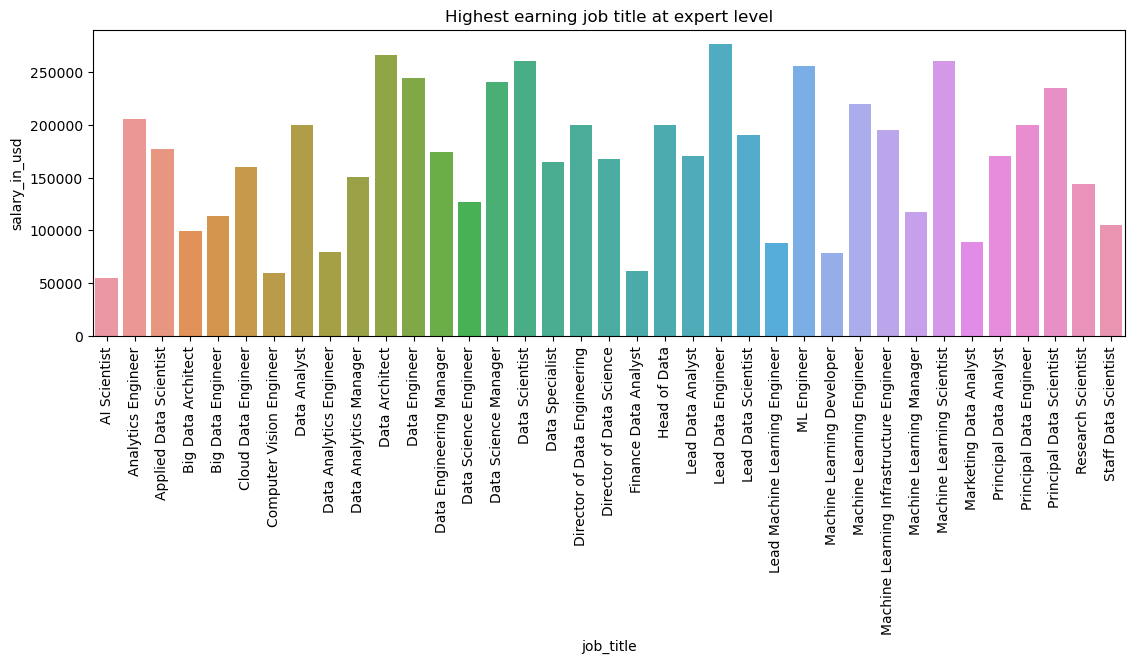

In [103]:
plt.figure(figsize=(12,4))
sns.barplot(data=df9,x="job_title",y="salary_in_usd")
plt.title("Highest earning job title at expert level")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

# Q9. Has salary of data science job roles increased over the passing years ?

In [107]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level/Intermediate,Full-time,Data Scientist,79833,DE,No remote,DE,large
1,2020,Senior-level/Expert,Full-time,Machine Learning Scientist,260000,JP,No remote,JP,small


In [118]:
df_year=df.groupby(["work_year"],as_index=False)["salary_in_usd"].mean()
df_year

,work_year,salary_in_usd
0,2020,82775.884058
1,2021,92362.744076
2,2022,120399.160000


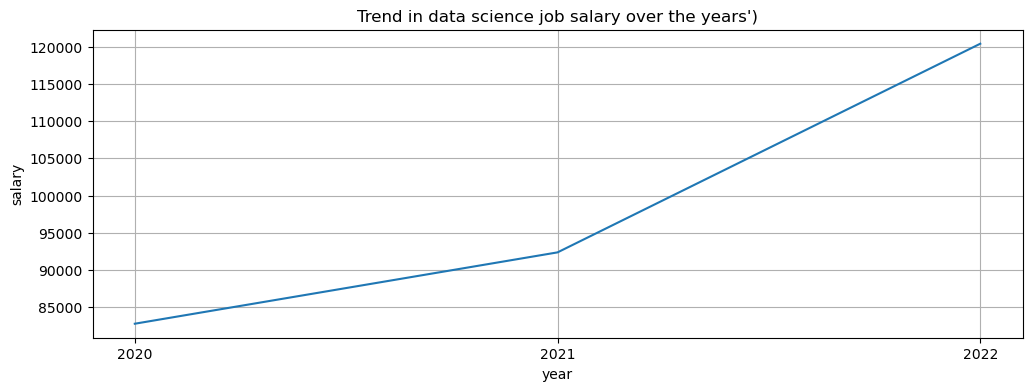

In [123]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_year,x="work_year",y="salary_in_usd")
plt.xticks([2020,2021,2022])
plt.xlabel("year")
plt.ylabel("salary")
plt.title("Trend in data science job salary over the years')")
plt.grid(True)
plt.show()

### Insights:
Salary of data science job roles increased over the passing years

# Q10. What is the trend of salary paid by medium size company over the passing years ?

In [124]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level/Intermediate,Full-time,Data Scientist,79833,DE,No remote,DE,large
1,2020,Senior-level/Expert,Full-time,Machine Learning Scientist,260000,JP,No remote,JP,small


In [125]:
df["company_size"].unique()

array(['large', 'small', 'medium'], dtype=object)

In [142]:
df_med=df[df["company_size"]=="medium"]
df_year_med=df_med.groupby(["work_year"],as_index=False)["salary_in_usd"].mean()
df_year_med

,work_year,salary_in_usd
0,2020,89734.230769
1,2021,74154.792453
2,2022,123528.396396


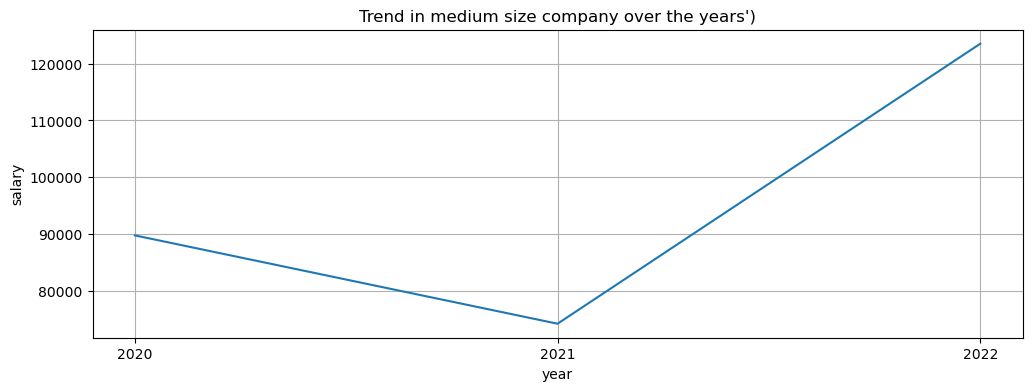

In [146]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_year_med,x="work_year",y="salary_in_usd")
plt.xticks([2020,2021,2022])
plt.xlabel("year")
plt.ylabel("salary")
plt.title("Trend in medium size company over the years')")
plt.grid(True)
plt.show()

### Insights:-
Medium size companies paid less to the employees in 2021 than in 2020.

# Q11. What is the trend of salary paid by large size company over the passing years ?

In [147]:
df_large=df[df["company_size"]=="large"]
df_year_large=df_large.groupby(["work_year"],as_index=False)["salary_in_usd"].mean()
df_year_large

,work_year,salary_in_usd
0,2020,89387.967742
1,2021,107950.807018
2,2022,115679.512195


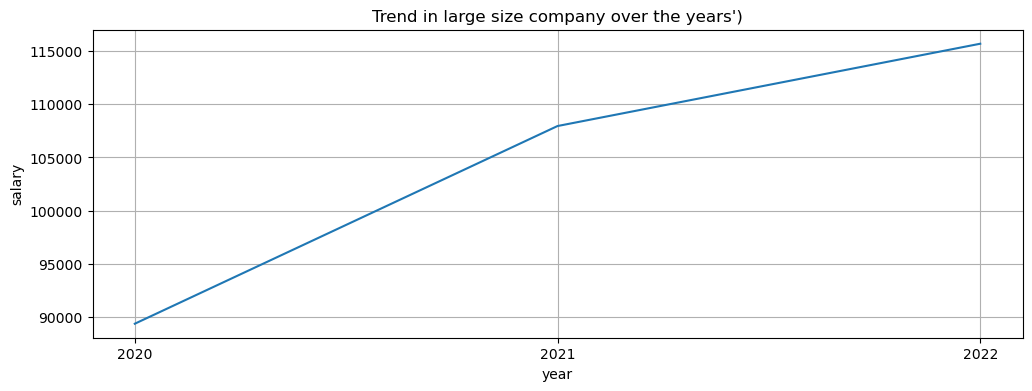

In [148]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_year_large,x="work_year",y="salary_in_usd")
plt.xticks([2020,2021,2022])
plt.xlabel("year")
plt.ylabel("salary")
plt.title("Trend in large size company over the years')")
plt.grid(True)
plt.show()

# Q12. What is the trend of salary paid by small size company over the passing years ?

In [150]:
df_small=df[df["company_size"]=="small"]
df_year_small=df_small.groupby(["work_year"],as_index=False)["salary_in_usd"].mean()
df_year_small

,work_year,salary_in_usd
0,2020,70958.560000
1,2021,73907.795455
2,2022,78633.750000


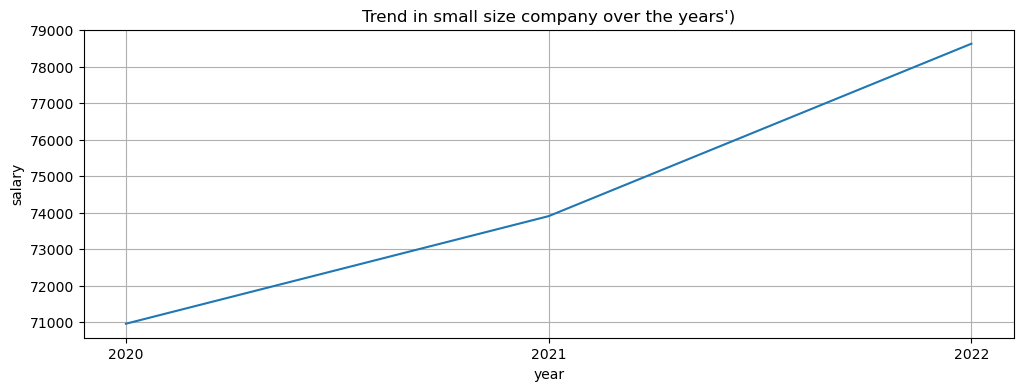

In [151]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_year_small,x="work_year",y="salary_in_usd")
plt.xticks([2020,2021,2022])
plt.xlabel("year")
plt.ylabel("salary")
plt.title("Trend in small size company over the years')")
plt.grid(True)
plt.show()